In [158]:
from StringIO import StringIO
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.contrib import learn
from sklearn import metrics

In [10]:
%matplotlib inline

In [11]:
COLUMNS = ['stock','date','open','high','low',
           'close','volume','ex_dividend','split_ratio',
           'adj_open','adj_high','adj_low','adj_close','adj_volume']

In [26]:
AAMC = pd.read_csv('AAMC.csv')
AAMC_close = AAMC.close[:1000]

In [27]:
AAMC

,date,stock,open,high,low,close,volume,ex_dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
0,2012-12-13,AAMC,15.00,15.0000,15.0000,15.0000,100.0,0.0,1.0,15.00,15.0000,15.0000,15.0000,100.0
1,2012-12-14,AAMC,19.00,30.0000,19.0000,30.0000,144600.0,0.0,1.0,19.00,30.0000,19.0000,30.0000,144600.0
2,2012-12-17,AAMC,31.50,65.0000,31.5000,65.0000,68600.0,0.0,1.0,31.50,65.0000,31.5000,65.0000,68600.0
3,2012-12-18,AAMC,65.00,89.0000,65.0000,80.0000,43600.0,0.0,1.0,65.00,89.0000,65.0000,80.0000,43600.0
4,2012-12-19,AAMC,80.00,84.0000,78.0000,84.0000,24000.0,0.0,1.0,80.00,84.0000,78.0000,84.0000,24000.0
5,2012-12-20,AAMC,84.00,84.0000,80.0000,80.2500,33300.0,0.0,1.0,84.00,84.0000,80.0000,80.2500,33300.0
6,2012-12-21,AAMC,80.50,81.5000,75.0000,80.0000,20700.0,0.0,1.0,80.50,81.5000,75.0000,80.0000,20700.0
7,2012-12-24,AAMC,81.00,93.5000,80.0000,80.0000,3700.0,0.0,1.0,81.00,93.5000,80.0000,80.0000,3700.0
8,2012-12-26,AAMC,80.00,90.0000,77.0000,77.0000,56100.0,0.0,1.0,80.00,90.0000,77.0000,77.0000,56100.0
9,2012-12-27,AAMC,75.00,75.0200,55.0000,59.0000,54300.0,0.0,1.0,75.00,75.0200,55.0000,59.0000,54300.0


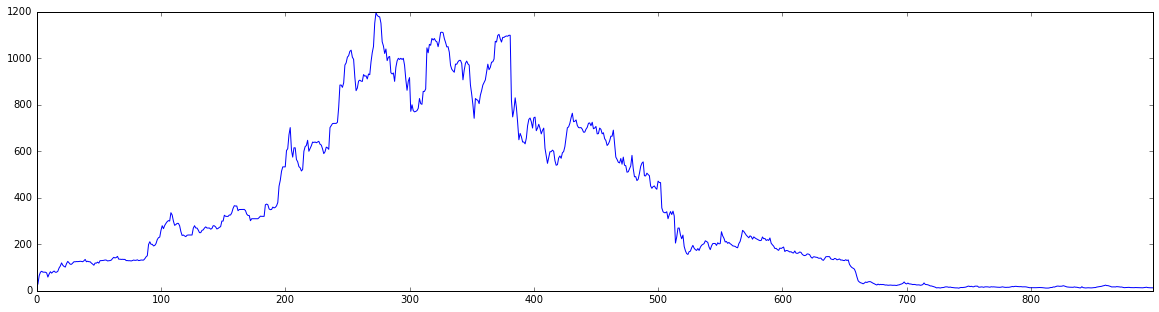

In [28]:
_ = AAMC_close.plot(figsize=(20,5))

In [29]:
AAMC_close

0       15.0000
1       30.0000
2       65.0000
3       80.0000
4       84.0000
5       80.2500
6       80.0000
7       80.0000
8       77.0000
9       59.0000
10      72.3500
11      82.0000
12      76.0000
13      81.2500
14      85.0000
15      79.8000
16      80.0000
17      84.0000
18      98.0000
19     106.5000
20     120.0000
21     110.0000
22     104.7000
23     102.1100
24     117.0000
25     126.5000
26     120.0000
27     114.2500
28     114.1000
29     119.3500
         ...   
869     17.9500
870     17.6100
871     17.0000
872     16.0300
873     16.2500
874     14.9800
875     13.5000
876     14.0000
877     14.5500
878     14.5700
879     14.7920
880     13.8500
881     13.7100
882     13.5000
883     13.4300
884     13.9700
885     13.8400
886     13.9100
887     13.5300
888     13.7000
889     13.5000
890     12.9400
891     13.7700
892     14.3000
893     15.2699
894     13.8300
895     13.4100
896     13.0300
897     13.0800
898     12.8600
Name: close, dtype: floa

In [30]:
a = pd.DataFrame()

a['shift_0'] = AAMC_close.values
a['shift_1'] = a.shift_0.shift(1)
a['shift_2'] = a.shift_0.shift(2)
a['shift_3'] = a.shift_0.shift(3)
a['shift_4'] = a.shift_0.shift(4)
a['shift_5'] = a.shift_0.shift(5)

a = a.fillna(-1)

a['return'] = a.shift_0 - a.shift_1
a['return_boolean'] = a['return'] < 0
a.return_boolean = a.return_boolean.astype(np.int)

a = a[5:]

In [31]:
a

,shift_0,shift_1,shift_2,shift_3,shift_4,shift_5,return,return_boolean
5,80.2500,84.0000,80.0000,65.0000,30.0000,15.0000,-3.7500,1
6,80.0000,80.2500,84.0000,80.0000,65.0000,30.0000,-0.2500,1
7,80.0000,80.0000,80.2500,84.0000,80.0000,65.0000,0.0000,0
8,77.0000,80.0000,80.0000,80.2500,84.0000,80.0000,-3.0000,1
9,59.0000,77.0000,80.0000,80.0000,80.2500,84.0000,-18.0000,1
10,72.3500,59.0000,77.0000,80.0000,80.0000,80.2500,13.3500,0
11,82.0000,72.3500,59.0000,77.0000,80.0000,80.0000,9.6500,0
12,76.0000,82.0000,72.3500,59.0000,77.0000,80.0000,-6.0000,1
13,81.2500,76.0000,82.0000,72.3500,59.0000,77.0000,5.2500,0
14,85.0000,81.2500,76.0000,82.0000,72.3500,59.0000,3.7500,0


In [32]:
X = a.iloc[:,1:6]
X

,shift_1,shift_2,shift_3,shift_4,shift_5
5,84.0000,80.0000,65.0000,30.0000,15.0000
6,80.2500,84.0000,80.0000,65.0000,30.0000
7,80.0000,80.2500,84.0000,80.0000,65.0000
8,80.0000,80.0000,80.2500,84.0000,80.0000
9,77.0000,80.0000,80.0000,80.2500,84.0000
10,59.0000,77.0000,80.0000,80.0000,80.2500
11,72.3500,59.0000,77.0000,80.0000,80.0000
12,82.0000,72.3500,59.0000,77.0000,80.0000
13,76.0000,82.0000,72.3500,59.0000,77.0000
14,81.2500,76.0000,82.0000,72.3500,59.0000


In [33]:
y = a.iloc[:,7]
y

5      1
6      1
7      0
8      1
9      1
10     0
11     0
12     1
13     0
14     0
15     1
16     0
17     0
18     0
19     0
20     0
21     1
22     1
23     1
24     0
25     0
26     1
27     1
28     1
29     0
30     0
31     1
32     0
33     1
34     0
      ..
869    0
870    1
871    1
872    1
873    0
874    1
875    1
876    0
877    0
878    0
879    0
880    1
881    1
882    1
883    1
884    0
885    1
886    0
887    1
888    0
889    1
890    1
891    0
892    0
893    0
894    1
895    1
896    1
897    0
898    1
Name: return_boolean, dtype: int64

In [113]:
XX = X.values
XX

array([[ 84.    ,  80.    ,  65.    ,  30.    ,  15.    ],
       [ 80.25  ,  84.    ,  80.    ,  65.    ,  30.    ],
       [ 80.    ,  80.25  ,  84.    ,  80.    ,  65.    ],
       ..., 
       [ 13.41  ,  13.83  ,  15.2699,  14.3   ,  13.77  ],
       [ 13.03  ,  13.41  ,  13.83  ,  15.2699,  14.3   ],
       [ 13.08  ,  13.03  ,  13.41  ,  13.83  ,  15.2699]])

In [101]:
yy = y.values
yy

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0,

In [169]:
def char_rnn_model(x, y):

    y = tf.one_hot(y, 2, 1, 0)
    byte_list = learn.ops.one_hot_matrix(x, 256)
    print 'byte_list_one_hot', byte_list
    byte_list = tf.unpack(byte_list, axis=1)
    print 'byte_list_unpack', byte_list
    
    print 'x_raw', x
    xx = tf.unpack(x, axis=1)
    #xx = tf.reshape(xx, (-1,1))
    print 'x_unpacked', xx

    cell = tf.nn.rnn_cell.GRUCell(500)
    _, encoding = tf.nn.rnn(cell, xx, dtype=tf.float32)

    prediction, loss = learn.models.logistic_regression(encoding, y)

    train_op = tf.contrib.layers.optimize_loss(
        loss, tf.contrib.framework.get_global_step(),
        optimizer='Adam', learning_rate=0.001)

    return {'class': tf.argmax(prediction, 1), 'prob': prediction}, loss, train_op

In [170]:
classifier = learn.Estimator(model_fn=char_rnn_model)

In [171]:
XX = XX.reshape((-1, 5, 1))
print XX.shape
XX

(894, 5, 1)


array([[[ 84.    ],
        [ 80.    ],
        [ 65.    ],
        [ 30.    ],
        [ 15.    ]],

       [[ 80.25  ],
        [ 84.    ],
        [ 80.    ],
        [ 65.    ],
        [ 30.    ]],

       [[ 80.    ],
        [ 80.25  ],
        [ 84.    ],
        [ 80.    ],
        [ 65.    ]],

       ..., 
       [[ 13.41  ],
        [ 13.83  ],
        [ 15.2699],
        [ 14.3   ],
        [ 13.77  ]],

       [[ 13.03  ],
        [ 13.41  ],
        [ 13.83  ],
        [ 15.2699],
        [ 14.3   ]],

       [[ 13.08  ],
        [ 13.03  ],
        [ 13.41  ],
        [ 13.83  ],
        [ 15.2699]]])

In [172]:
import logging
logging.getLogger().setLevel(logging.INFO)

classifier.fit(XX, yy, steps=5000)

byte_list_one_hot Tensor("one_hot_1:0", shape=(?, 5, 1, 256), dtype=float32)
byte_list_unpack [<tf.Tensor 'unpack:0' shape=(?, 1, 256) dtype=float32>, <tf.Tensor 'unpack:1' shape=(?, 1, 256) dtype=float32>, <tf.Tensor 'unpack:2' shape=(?, 1, 256) dtype=float32>, <tf.Tensor 'unpack:3' shape=(?, 1, 256) dtype=float32>, <tf.Tensor 'unpack:4' shape=(?, 1, 256) dtype=float32>]
x_raw Tensor("input:0", shape=(?, 5, 1), dtype=float32)
x_unpacked [<tf.Tensor 'unpack_1:0' shape=(?, 1) dtype=float32>, <tf.Tensor 'unpack_1:1' shape=(?, 1) dtype=float32>, <tf.Tensor 'unpack_1:2' shape=(?, 1) dtype=float32>, <tf.Tensor 'unpack_1:3' shape=(?, 1) dtype=float32>, <tf.Tensor 'unpack_1:4' shape=(?, 1) dtype=float32>]


INFO:tensorflow:Create CheckpointSaver
INFO:tensorflow:Step 1: loss = 1.29143
INFO:tensorflow:Step 101: loss = 0.68204
INFO:tensorflow:Step 201: loss = 0.674945
INFO:tensorflow:Saving checkpoints for 300 into /tmp/tmphtRStS/model.ckpt.
INFO:tensorflow:Step 301: loss = 0.664779
INFO:tensorflow:Step 401: loss = 0.647342
INFO:tensorflow:Step 501: loss = 0.622653
INFO:tensorflow:Saving checkpoints for 600 into /tmp/tmphtRStS/model.ckpt.
INFO:tensorflow:Step 601: loss = 0.598402
INFO:tensorflow:Step 701: loss = 0.555243
INFO:tensorflow:Step 801: loss = 0.514863
INFO:tensorflow:Saving checkpoints for 900 into /tmp/tmphtRStS/model.ckpt.
INFO:tensorflow:Step 901: loss = 0.479471
INFO:tensorflow:Step 1001: loss = 0.470471
INFO:tensorflow:Step 1101: loss = 0.454911
INFO:tensorflow:Saving checkpoints for 1200 into /tmp/tmphtRStS/model.ckpt.
INFO:tensorflow:Step 1201: loss = 0.446327
INFO:tensorflow:Step 1301: loss = 0.438925
INFO:tensorflow:Step 1401: loss = 0.436467
INFO:tensorflow:Saving checkp

Estimator(params=None)

In [173]:
y_predicted = classifier.predict(XX)
score = metrics.accuracy_score(yy, y_predicted['class'])
print('Accuracy: {0:f}'.format(score))

byte_list_one_hot Tensor("one_hot_1:0", shape=(?, 5, 1, 256), dtype=float32)
byte_list_unpack [<tf.Tensor 'unpack:0' shape=(?, 1, 256) dtype=float32>, <tf.Tensor 'unpack:1' shape=(?, 1, 256) dtype=float32>, <tf.Tensor 'unpack:2' shape=(?, 1, 256) dtype=float32>, <tf.Tensor 'unpack:3' shape=(?, 1, 256) dtype=float32>, <tf.Tensor 'unpack:4' shape=(?, 1, 256) dtype=float32>]
x_raw Tensor("input:0", shape=(?, 5, 1), dtype=float32)
x_unpacked [<tf.Tensor 'unpack_1:0' shape=(?, 1) dtype=float32>, <tf.Tensor 'unpack_1:1' shape=(?, 1) dtype=float32>, <tf.Tensor 'unpack_1:2' shape=(?, 1) dtype=float32>, <tf.Tensor 'unpack_1:3' shape=(?, 1) dtype=float32>, <tf.Tensor 'unpack_1:4' shape=(?, 1) dtype=float32>]


INFO:tensorflow:Loading model from checkpoint: /tmp/tmphtRStS/model.ckpt-5000-?????-of-00001.


Accuracy: 0.880313
